Importing the Dependencies

In [46]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import  SVC
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

In [47]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/Users/tarunkumar/Desktop/creditcard.csv')

In [48]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [50]:
credit_card_data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [51]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


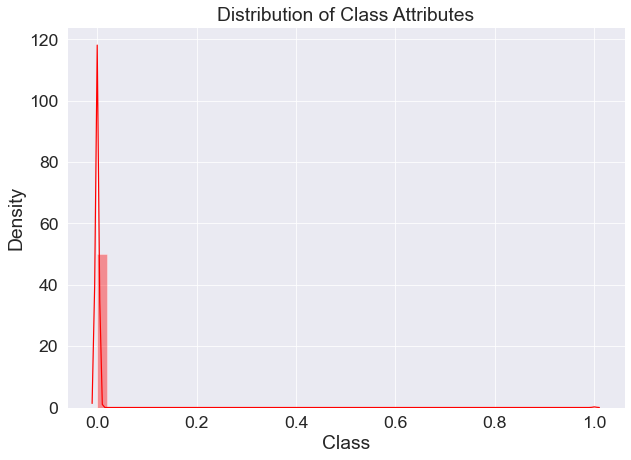

In [52]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Class Attributes")

sns.distplot(credit_card_data['Class'], color='red');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


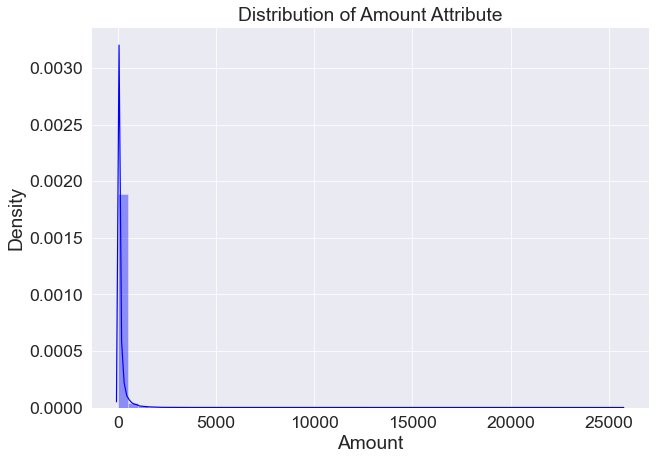

In [53]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Amount Attribute")

sns.distplot(credit_card_data['Amount'], color='blue');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


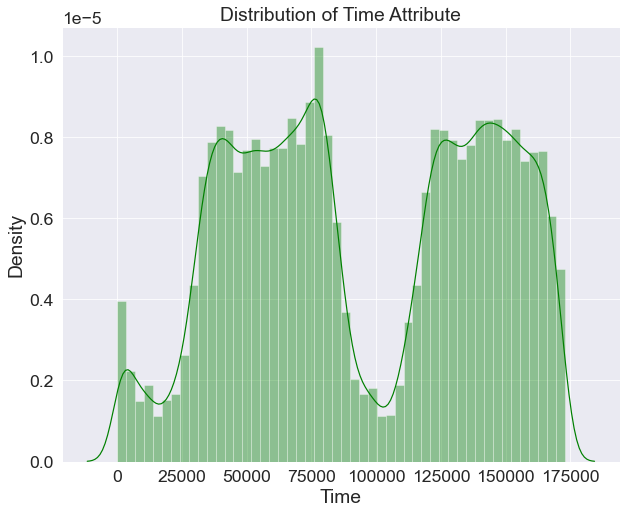

In [54]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Time Attribute")

sns.distplot(credit_card_data['Time'], color='green');

In [55]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

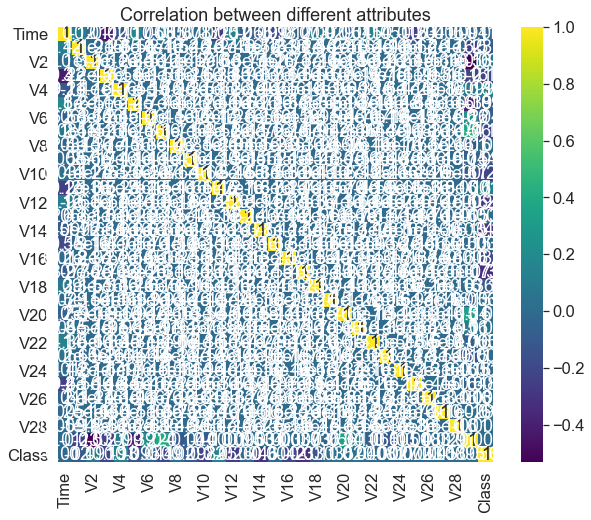

In [56]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.heatmap(credit_card_data.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Correlation between different attributes")
plt.show()

In [57]:
credit_card_data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [58]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

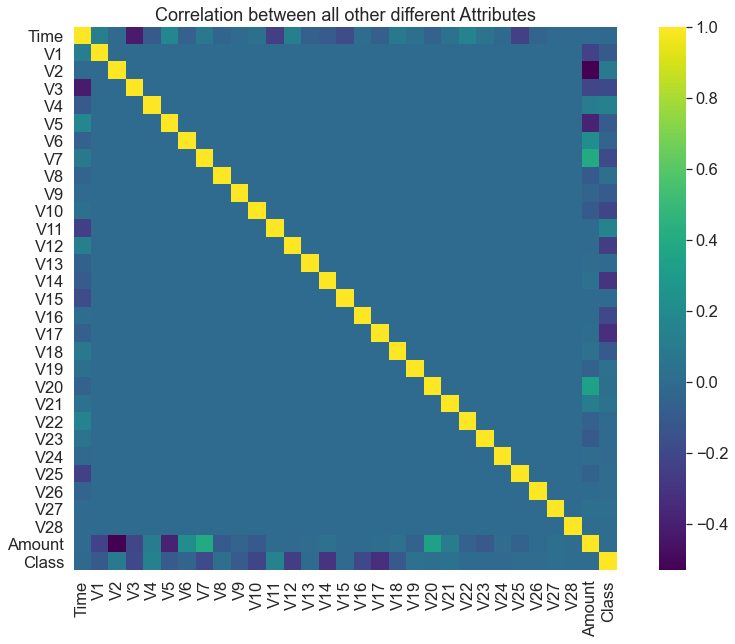

In [59]:
plt.figure(figsize=(15,10))

sns.heatmap(credit_card_data.corr(), vmax=1, square=True, cmap='viridis')
plt.title("Correlation between all other different Attributes")
plt.show()

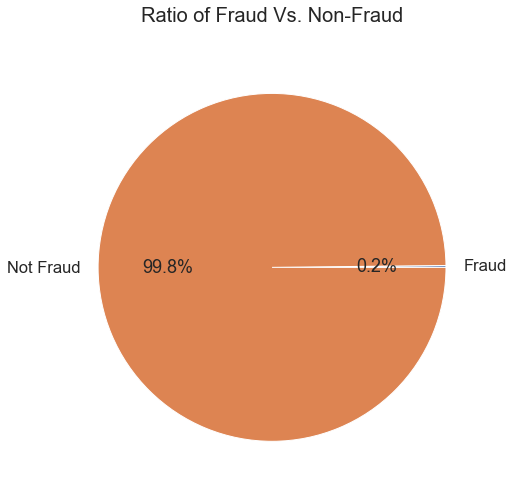

In [60]:
fruad = len(credit_card_data[credit_card_data['Class']==1])
notfruad = len(credit_card_data[credit_card_data['Class']==0])

## Data to plot
labels = 'Fraud','Not Fraud'
sizes = [fruad, notfruad]

#plot
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',  startangle=0)
plt.title('Ratio of Fraud Vs. Non-Fraud\n', fontsize=20)
sns.set_context("paper", font_scale=2)

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [61]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [62]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [63]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [64]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [65]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [66]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [67]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [68]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
255636,157319.0,-0.897774,0.824269,0.630144,-0.841640,1.603764,-0.351636,0.893615,0.072029,-0.886358,...,-0.294268,-1.019612,-0.288003,0.263104,0.560988,0.289371,-0.054147,0.065477,4.99,0
146047,87390.0,-5.740291,5.552787,-1.700460,-1.943562,0.839502,1.829646,-1.619007,-14.763597,4.575603,...,11.849055,-2.887533,1.477881,-0.874983,-0.053721,-0.329516,0.306214,-0.885728,0.89,0
112532,72690.0,1.217835,0.629545,-0.474519,1.161924,0.260415,-0.740313,0.167956,-0.048486,-0.251738,...,-0.043746,-0.112125,-0.171257,-0.149460,0.688572,-0.322472,0.027710,0.042860,1.00,0
99141,66985.0,0.719831,-0.546084,-0.117639,1.140317,-0.333396,-0.367354,0.437532,-0.118385,-0.246387,...,0.212909,0.019902,-0.379012,0.022010,0.596679,-0.352519,-0.041530,0.051778,265.50,0
273044,165393.0,1.777515,-0.049878,-2.165419,1.173591,0.780476,-0.972267,1.045460,-0.493146,-0.599941,...,0.302578,0.682417,-0.254590,-0.291165,0.555296,-0.433915,-0.063067,-0.052760,150.00,0


In [69]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [70]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [71]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92473.107724,-0.003394,0.042521,-0.033887,-0.017663,-0.080872,0.064694,0.041492,-0.133642,0.073236,...,-0.024896,0.035990,-0.004040,-0.024753,-0.022549,0.021593,0.010409,0.005174,0.022401,106.958130
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [72]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [73]:
print(X)
new_dataset.to_csv('train.csv')

            Time        V1        V2        V3        V4        V5        V6  \
255636  157319.0 -0.897774  0.824269  0.630144 -0.841640  1.603764 -0.351636   
146047   87390.0 -5.740291  5.552787 -1.700460 -1.943562  0.839502  1.829646   
112532   72690.0  1.217835  0.629545 -0.474519  1.161924  0.260415 -0.740313   
99141    66985.0  0.719831 -0.546084 -0.117639  1.140317 -0.333396 -0.367354   
273044  165393.0  1.777515 -0.049878 -2.165419  1.173591  0.780476 -0.972267   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7         V8        V9  

In [74]:
print(Y)

255636    0
146047    0
112532    0
99141     0
273044    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [76]:
# print(X_train)
X_test=X_test.reset_index(drop=True)
X_train.to_csv('x_t.csv')
Y_train.to_csv('y_t.csv')
X_test.to_csv('x_test.csv')
Y_test.to_csv('y_test.csv')
#print(Y_train)
print(X_train)
print(X_test)
print(Y_train)
#data2=X_test.drop(columns='', axis=1)
#print(data2)
#data2.to_csv('x_test2.csv')

            Time         V1        V2         V3        V4         V5  \
100623   67571.0  -0.758469 -0.045410  -0.168438 -1.313275  -1.901763   
249068  154228.0   2.176003 -0.741078  -1.431167 -1.063706  -0.340546   
91281    63393.0   1.361927 -0.765832   0.516151 -1.002953  -0.843745   
130469   79360.0  -3.584133  2.341818   0.154442  0.110757  -2.137401   
228786  145663.0   2.129386 -0.047018  -1.493742  0.157002   0.445250   
...          ...        ...       ...        ...       ...        ...   
35025    37924.0  -0.517603 -0.000264   3.016515  1.021618  -0.751546   
189592  128474.0   1.913465 -0.892030  -1.007111 -1.162106   0.263097   
223618  143456.0  -2.006582  3.676577  -5.463811  7.232058  -1.627859   
43061    41353.0 -15.020981  8.075240 -16.298091  5.664820 -11.918153   
258989  158907.0  -0.183537  1.183149  -0.762221 -0.497178   0.532765   

              V6         V7        V8        V9  ...       V20       V21  \
100623  0.739433   3.071892 -0.483422  0.618203

In [77]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

test-data_accuracy-1    ---- logistic regression

test_data_accuracy-2    ----decision tree

test_data_accuracy-3    ----KNN

test_data_accuracy4     ----Support Vector Machine

test_data_accuracy5    ------RandomForest 

test_data_accuracy6     -----XGBOOSTER



Logistic Regression

Accuracy on Training data :  0.9479034307496823
Accuracy score on Test Data :  0.9289340101522843
F1 score on Test Data :  0.9289230205662254


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 8.7, 'Predicted Label')

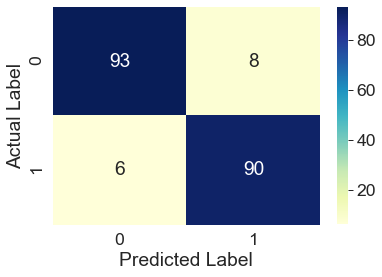

In [96]:
model = LogisticRegression(random_state=2)
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy1 = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy1)
test_data_f1score1 = f1_score(Y_test, X_test_prediction, average='weighted')
print('F1 score on Test Data : ', test_data_f1score1)
cnf_matrix =confusion_matrix(X_test_prediction,Y_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [79]:
import pickle
pickle_out = open("lr_class.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

desicion trees

Accuracy on Training data :  0.9479034307496823
Accuracy score on Test Data :  0.9137055837563451
F1 score on Test Data :  0.913410979774859


Text(0.5, 8.7, 'Predicted Label')

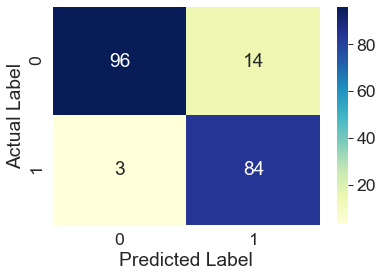

In [80]:
model1 = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
model1.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction, Y_test)
#print('confusion matrix of test data'.format(confusion_matrix(X_test_prediction,Y_test,labels=[0,1])))
print('Accuracy score on Test Data : ', test_data_accuracy2)
test_data_f1score2 = f1_score(Y_test, X_test_prediction, average='weighted')
print('F1 score on Test Data : ', test_data_f1score2)
cnf_matrix = confusion_matrix(X_test_prediction,Y_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [81]:
pickle_out = open("dt_class.pkl", "wb")
pickle.dump(model1, pickle_out)
pickle_out.close()

K NEAREST NEIGHBOUR

Accuracy on Training data :  0.7496823379923762
Accuracy score on Test Data :  0.6243654822335025
F1 score on Test Data :  0.6243654822335025


Text(0.5, 8.7, 'Predicted Label')

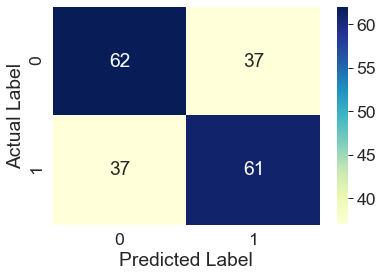

In [82]:
n = 5
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = KNN.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = KNN.predict(X_test)
test_data_accuracy3 = accuracy_score(X_test_prediction, Y_test)
#print('confusion matrix of test data'.format(confusion_matrix(X_test_prediction,Y_test,labels=[0,1])))
print('Accuracy score on Test Data : ', test_data_accuracy3)
test_data_f1score3 = f1_score(Y_test, X_test_prediction, average='weighted')
print('F1 score on Test Data : ', test_data_f1score3)
cnf_matrix = confusion_matrix(X_test_prediction,Y_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [83]:
pickle_out = open("knn_class.pkl", "wb")
pickle.dump(KNN, pickle_out)
pickle_out.close()

SUPPORT VECTOR MACHINE

Accuracy on Training data :  0.5628970775095299
Accuracy score on Test Data :  0.5736040609137056
F1 score on Test Data :  0.5644849737208572


Text(0.5, 8.7, 'Predicted Label')

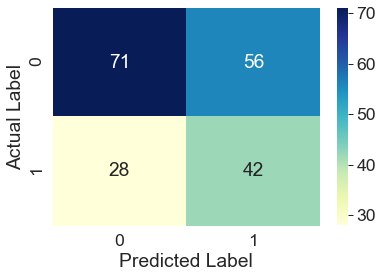

In [84]:
svm = SVC()
svm.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = svm.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = svm.predict(X_test)
test_data_accuracy4 = accuracy_score(X_test_prediction, Y_test)
#print('confusion matrix of test data'.format(confusion_matrix(X_test_prediction,Y_test,labels=[0,1])))
print('Accuracy score on Test Data : ', test_data_accuracy4)
test_data_f1score4 = f1_score(Y_test, X_test_prediction, average='weighted')
print('F1 score on Test Data : ', test_data_f1score4)
cnf_matrix = confusion_matrix(X_test_prediction,Y_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [85]:
pickle_out = open("svm_class.pkl", "wb")
pickle.dump(svm, pickle_out)
pickle_out.close()

RANDOM FOREST ALGORITHM

Accuracy on Training data :  0.9606099110546379
Accuracy score on Test Data :  0.9238578680203046
F1 score on Test Data :  0.9233838682881146


Text(0.5, 8.7, 'Predicted Label')

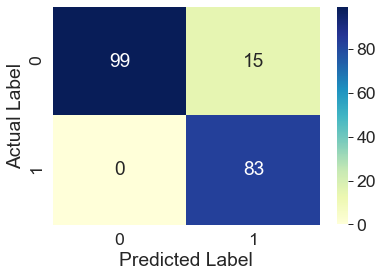

In [86]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy5 = accuracy_score(X_test_prediction, Y_test)
#print('confusion matrix of test data'.format(confusion_matrix(X_test_prediction,Y_test,labels=[0,1])))
print('Accuracy score on Test Data : ', test_data_accuracy5)
test_data_f1score5 = f1_score(Y_test, X_test_prediction, average='weighted')
print('F1 score on Test Data : ', test_data_f1score5)
cnf_matrix = confusion_matrix(X_test_prediction,Y_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

XG BOOSTER ALGORITHM

[19:54:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9289340101522843
F1 score on Test Data :  0.928801889948064


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Text(0.5, 8.7, 'Predicted Label')

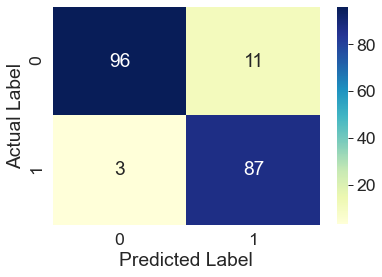

In [87]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = xgb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = xgb.predict(X_test)
test_data_accuracy6 = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy6)
test_data_f1score6 = f1_score(Y_test, X_test_prediction, average='weighted')
print('F1 score on Test Data : ', test_data_f1score6)
cnf_matrix = confusion_matrix(X_test_prediction,Y_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [88]:
pickle_out = open("xgb_class.pkl", "wb")
pickle.dump(xgb, pickle_out)
pickle_out.close()

In [89]:
import pickle
pickle_out = open("rf_class.pkl", "wb")
pickle.dump(rf,pickle_out)
pickle_out.close()

MULTI LAYER PERCEPTRON ALGORITHM


Accuracy score on Test Data :  0.49746192893401014
F1 score on Test Data :  0.6644067796610169


Text(0.5, 8.7, 'Predicted Label')

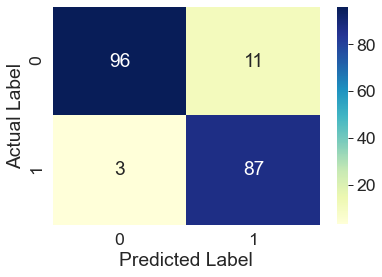

In [91]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train, Y_train)
y_pred = MLPC.predict(X_test)
recall_acc = recall_score (Y_test,y_pred)
recall_acc
test_data_accuracy7 = accuracy_score(y_pred, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy7)
test_data_f1score7 = f1_score(y_pred, Y_test, average='weighted')
print('F1 score on Test Data : ', test_data_f1score7)
cnf_matrix = confusion_matrix(X_test_prediction,Y_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [92]:
pickle_out = open("mlp_class.pkl", "wb")
pickle.dump(MLPC, pickle_out)
pickle_out.close()

Precision can be seen as a measure of quality, and recall as a measure of quantity. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

ANALYSING OR COMPARING THE RESULTS

In [93]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest', 'XGBoost', 'MLPClassifier'],
    'Score': [ test_data_f1score1,test_data_f1score2,test_data_f1score3,test_data_f1score4,test_data_f1score5,test_data_f1score6,test_data_f1score7]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
0.928923,Logistic Regression
0.928802,XGBoost
0.923384,Random Forest
0.913411,Decision Tree
0.664407,MLPClassifier


No handles with labels found to put in legend.


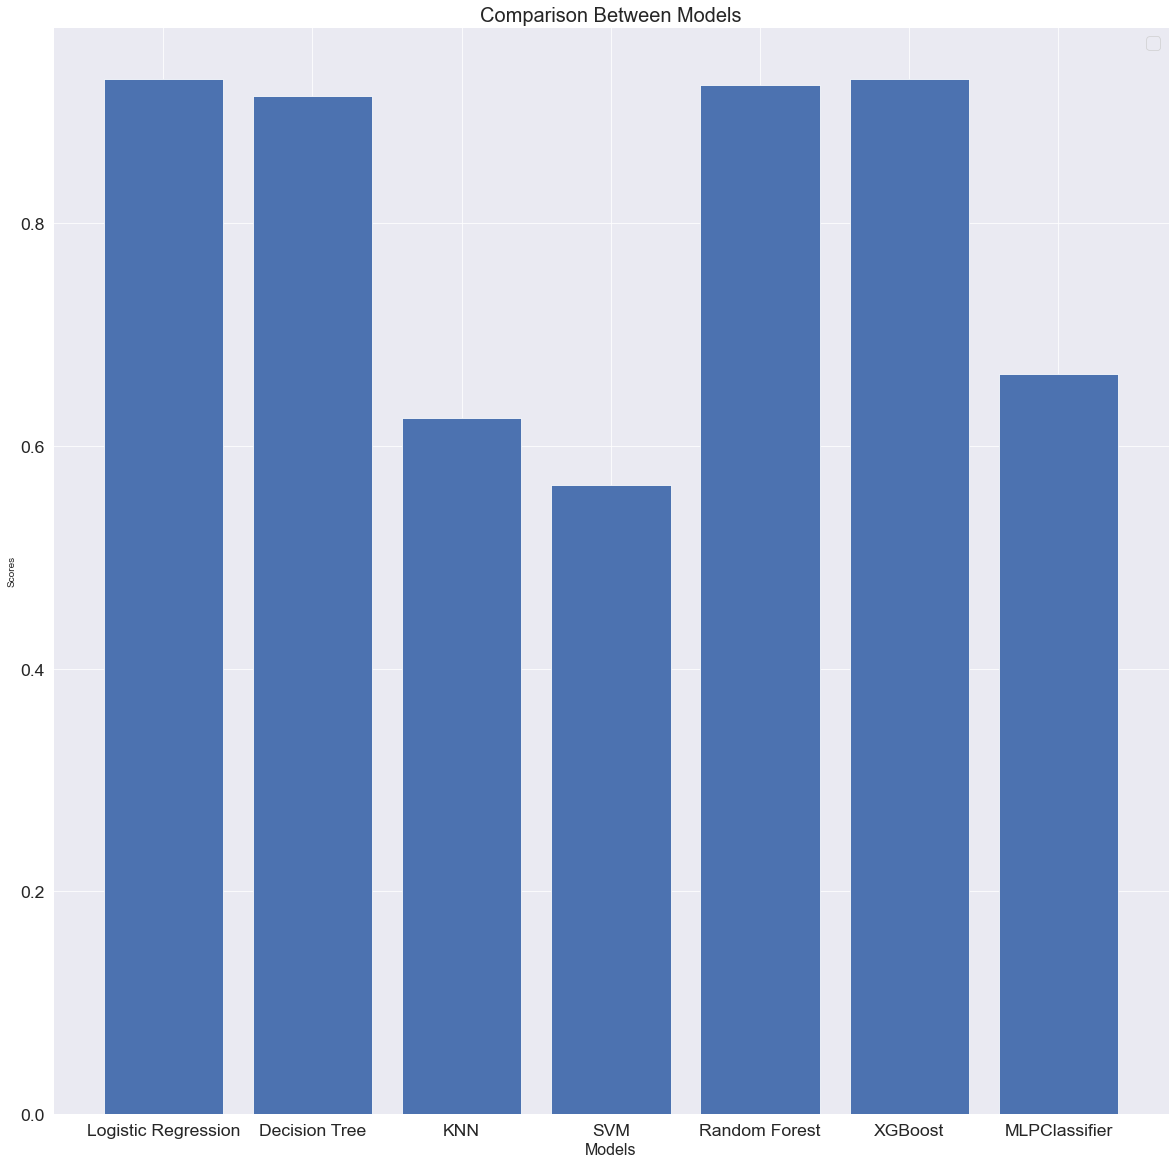

In [94]:
names = ['Logistic Regression','Decision Tree', 'KNN', 'SVM', 'Random Forest', 'XGBoost', 'MLPClassifier']
results = [test_data_f1score1,test_data_f1score2,test_data_f1score3,test_data_f1score4,test_data_f1score5,test_data_f1score6,test_data_f1score7]
plt.figure(figsize=(20,20))
plt.bar(names,results)
plt.xlabel("Models", fontsize=16) #seting the xtitle and size
plt.ylabel("Scores", fontsize=10) # Seting the ytitle and size
plt.title("Comparison Between Models", fontsize=20)
plt.legend()
plt.show()

In [95]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest', 'XGBoost', 'MLPClassifier'],
    'Score': [ test_data_accuracy1,test_data_accuracy2,test_data_accuracy3,test_data_accuracy4,test_data_accuracy5,test_data_accuracy6,test_data_accuracy7]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)


,Model
Score,
0.928934,Logistic Regression
0.928934,XGBoost
0.923858,Random Forest
0.913706,Decision Tree
0.624365,KNN
